In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [50]:
def myHog(image, cell_size_y, cell_size_x, blocksize_y, blocksize_x, bins):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    cell_size = (cell_size_y, cell_size_x)
    block_size = (blocksize_y, blocksize_x)
    nbins = bins
    hog = cv2.HOGDescriptor(_winSize = (gray.shape[1]//cell_size[1] * cell_size[1],
                                       gray.shape[0] // cell_size[0] * cell_size[0]),
                           _blockSize = (block_size[1] * cell_size[1],
                                        block_size[0] * cell_size[0]),
                           _blockStride = (cell_size[1], cell_size[0]),
                           _cellSize = (cell_size[1], cell_size[0]),
                           _nbins = nbins)
    n_cells = (gray.shape[0]//cell_size[0], gray.shape[1]//cell_size[1])

    hog_feats = hog.compute(gray).reshape(n_cells[1] - block_size[1]+1,
                                          n_cells[0] - block_size[0] +1,
                                          block_size[0], block_size[1], nbins).transpose((1,0,2,3,4))
    gradients = np.zeros((n_cells[0], n_cells[1], nbins))
    cell_counts = np.full((n_cells[0], n_cells[1], 1), 0, dtype = int)
    for off_y in range(block_size[0]):
        for off_x in range(block_size[1]):
            gradients[off_y:n_cells[0] - block_size[0] + off_y +1,
                     off_x:n_cells[1] - block_size[1] + off_x +1] += hog_feats[:, :, off_y, off_x, :]
            cell_counts[off_y:n_cells[0] - block_size[0] + off_y +1,
                      off_x:n_cells[1] - block_size[1] + off_x +1] +=1

    gradients /= cell_counts
    plt.figure(figsize=(10,nbins*2))
    for i in range(nbins):
        plt.subplot((nbins/3)+1,3,i+1)
        color_bins = i
        plt.pcolor(gradients[:,:,color_bins])
        plt.gca().invert_yaxis()
        plt.gca().set_aspect('equal', adjustable='box')
        plt.colorbar()
    plt.show()
    return gradients.shape

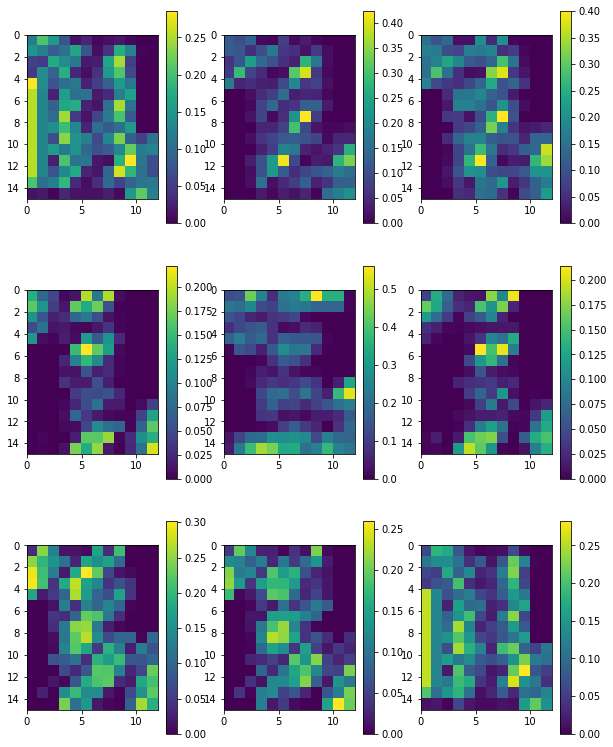

(15, 12, 9)

In [54]:
image = cv2.imread('../dataset/card_deck1/H3.jpg')
myHog(image, 8, 8, 2, 2, 9)

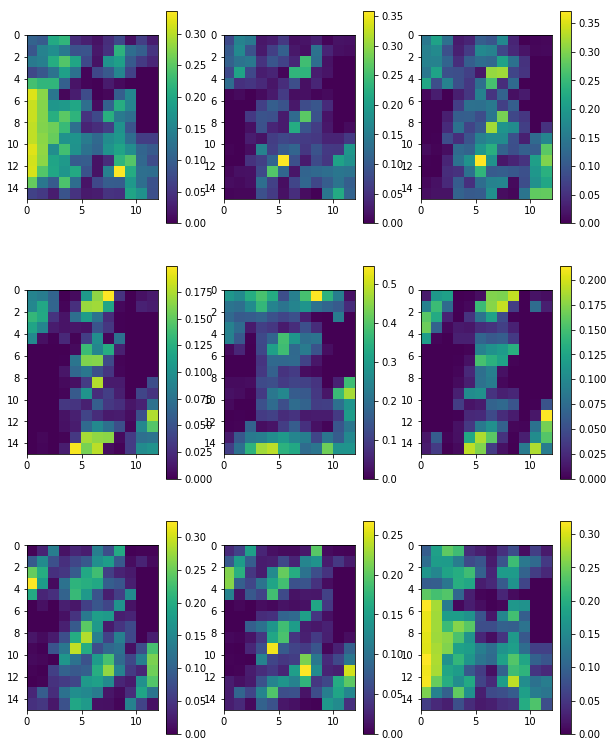

(15, 12, 9)

In [52]:
image = cv2.imread('../dataset/card_deck2/H3.jpg')
myHog(image, 8, 8, 2, 2, 9)

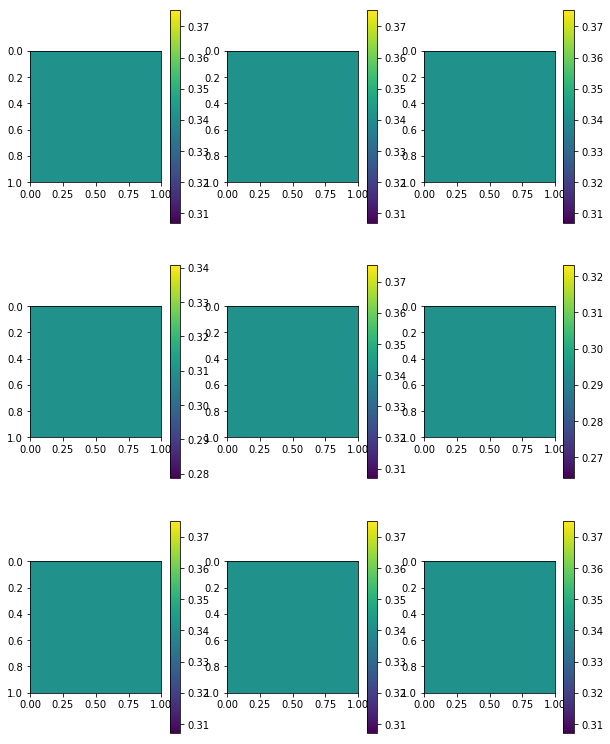

(1, 1, 9)

In [57]:
image = cv2.imread('../dataset/card_deck2/S3.jpg')
myHog(image, 120, 100, 1, 1, 9)